In [1]:
#importing libararies
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df=pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\Suraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#printing first five rows of the data
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
#printing last five rows of the data
df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,07-06-2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10-11-2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [5]:
#checking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102185 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
#getting the summary of the dataframe
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [7]:
df.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
df.rename(columns={'lat':'latitude','long':'longitude','host id':'host_id','host name':'host_name','neighbourhood group':'neighbourhood_group','country code':'country_code','room type':'room_type','Construction year':'Construction_year','service fee':'service_fee','minimum nights':'minimum_nights','number of reviews':'number_of_reviews','last review':'last_review','reviews per month':'reviews_per_months','review rate number':'reviews_rate_number','calculated host listings count':'calculated_host_listings_per_count','availability 365':'availability_365'},inplace=True)

In [9]:
df.head()

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,latitude,longitude,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_months,reviews_rate_number,calculated_host_listings_per_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
#checking for null values
df.isnull().sum()

id                                         0
NAME                                     250
host_id                                    0
host_identity_verified                   289
host_name                                414
neighbourhood_group                       29
neighbourhood                             16
latitude                                   8
longitude                                  8
country                                  532
country_code                             131
instant_bookable                         105
cancellation_policy                       76
room_type                                  0
Construction_year                        214
price                                    247
service_fee                              273
minimum_nights                           409
number_of_reviews                        183
last_review                            15893
reviews_per_months                     15879
reviews_rate_number                      326
calculated

In [11]:
#data cleansing
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

In [12]:
round(percent_missing, 2)

7.15

In [13]:
#removing nan values
df.dropna(axis=0)

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,latitude,longitude,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_months,reviews_rate_number,calculated_host_listings_per_count,availability_365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,01-03-2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL


In [14]:
#filling nan values with mode
df['NAME'] = df['NAME'].fillna(df['NAME'].mode()[0])
df['host_identity_verified'] = df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0])
df['host_name'] = df['host_name'].fillna(df['host_name'].mode()[0])
df['neighbourhood_group'] = df['neighbourhood_group'].fillna(df['neighbourhood_group'].mode()[0])
df['neighbourhood'] = df['neighbourhood'].fillna(df['neighbourhood'].mode()[0])
df['latitude'] = df['latitude'].fillna(df['latitude'].mode()[0])
df['longitude'] = df['longitude'].fillna(df['longitude'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['country_code'] = df['country_code'].fillna(df['country_code'].mode()[0])
df['instant_bookable'] = df['instant_bookable'].fillna(df['instant_bookable'].mode()[0])
df['cancellation_policy'] = df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0])
df['Construction_year'] = df['Construction_year'].fillna(df['Construction_year'].mode()[0])
df['price'] = df['price'].fillna(df['price'].mode()[0])
df['service_fee'] = df['service_fee'].fillna(df['service_fee'].mode()[0])
df['minimum_nights'] = df['minimum_nights'].fillna(df['minimum_nights'].mode()[0])
df['number_of_reviews'] = df['number_of_reviews'].fillna(df['number_of_reviews'].mode()[0])
df['last_review'] = df['last_review'].fillna(df['last_review'].mode()[0])
df['reviews_per_months'] = df['reviews_per_months'].fillna(df['reviews_per_months'].mode()[0])
df['reviews_rate_number'] = df['reviews_rate_number'].fillna(df['reviews_rate_number'].mode()[0])
df['calculated_host_listings_per_count'] = df['calculated_host_listings_per_count'].fillna(df['calculated_host_listings_per_count'].mode()[0])
df['availability_365'] = df['availability_365'].fillna(df['availability_365'].mode()[0])
df['house_rules'] = df['house_rules'].fillna(df['house_rules'].mode()[0])
df['license'] = df['license'].fillna(df['license'].mode()[0])


In [15]:
#removing dollor sign($) from price column
df=df.replace('\$','',regex=True)

In [16]:
df.head()

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,latitude,longitude,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_months,reviews_rate_number,calculated_host_listings_per_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,41662/AL
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,41662/AL
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124,3.0,0.0,6/23/2019,0.03,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",41662/AL
3,1002755,Home away from home,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,#NAME?,41662/AL
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",41662/AL


In [17]:
df['price']

0           966 
1           142 
2           620 
3           368 
4           204 
           ...  
102594      844 
102595      837 
102596      988 
102597      546 
102598    1,032 
Name: price, Length: 102599, dtype: object

In [18]:
#removing commas from the values in the price
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  102599 non-null  int64  
 1   NAME                                102599 non-null  object 
 2   host_id                             102599 non-null  int64  
 3   host_identity_verified              102599 non-null  object 
 4   host_name                           102599 non-null  object 
 5   neighbourhood_group                 102599 non-null  object 
 6   neighbourhood                       102599 non-null  object 
 7   latitude                            102599 non-null  float64
 8   longitude                           102599 non-null  float64
 9   country                             102599 non-null  object 
 10  country_code                        102599 non-null  object 
 11  instant_bookable          

In [20]:
df.isnull().sum()

id                                    0
NAME                                  0
host_id                               0
host_identity_verified                0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
country                               0
country_code                          0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
Construction_year                     0
price                                 0
service_fee                           0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_months                    0
reviews_rate_number                   0
calculated_host_listings_per_count    0
availability_365                      0
house_rules                           0


Finally we get rid of Nan and missing values

In [21]:
'''
Exploring the data
Identify trends and relationships.
'''

'\nExploring the data\nIdentify trends and relationships.\n'

In [22]:
#1. Area vs Price vs Room (What kind of areas or rooms are more expensive than others? and why?)
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

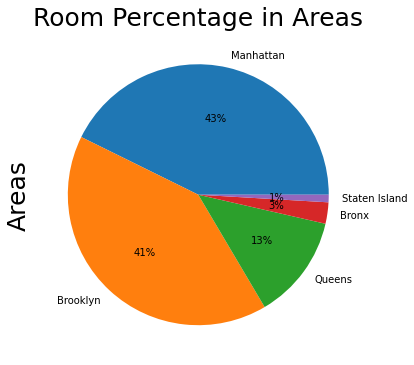

In [23]:
df['neighbourhood_group'].value_counts().plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,6))

plt.title("Room Percentage in Areas", size=25)
plt.ylabel("Areas", size=25)

plt.show()

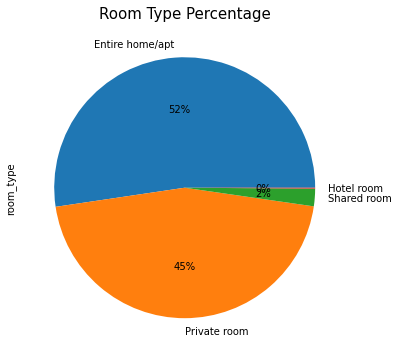

In [24]:
df['room_type'].value_counts().plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,6))

plt.title("Room Type Percentage", size=15)

plt.show()

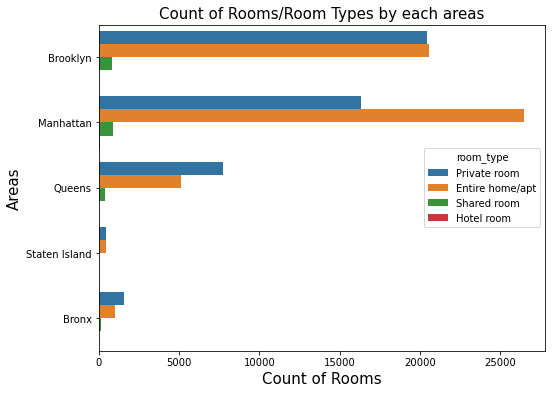

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=df, y='neighbourhood_group', hue='room_type', ax=ax)

plt.title('Count of Rooms/Room Types by each areas', size=15)
plt.xlabel('Count of Rooms', size=15)
plt.ylabel('Areas', size=15)

plt.show()

In [26]:
order = ['Manhattan', 'Brooklyn','Queens', 'Bronx', 'Staten Island']

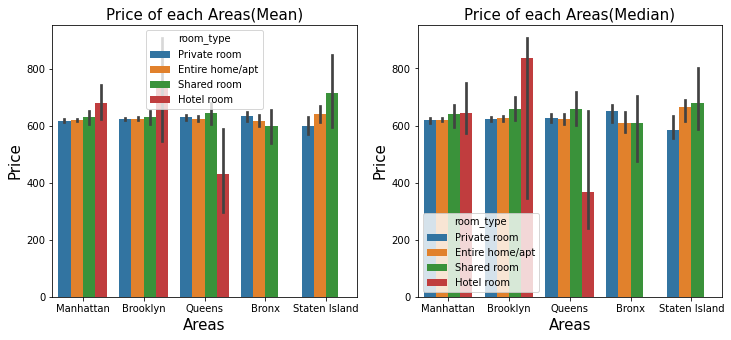

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(data=df, y='price', x='neighbourhood_group',ax=ax[0], hue='room_type' ,order=order)
ax[0].set_title('Price of each Areas(Mean)', size=15)
ax[0].set_xlabel('Areas', size=15)
ax[0].set_ylabel('Price', size=15)

sns.barplot(data=df, y='price', x='neighbourhood_group',ax=ax[1], hue='room_type' ,order=order, estimator = median)
ax[1].set_title('Price of each Areas(Median)', size=15)
ax[1].set_xlabel('Areas', size=15)
ax[1].set_ylabel("Price", size=15)


plt.show()

Since there is only a small data about Staten Island, there is a huge error by it, i added median value also.

This shows us that the entire shared rooms in New York is the most expensive one.

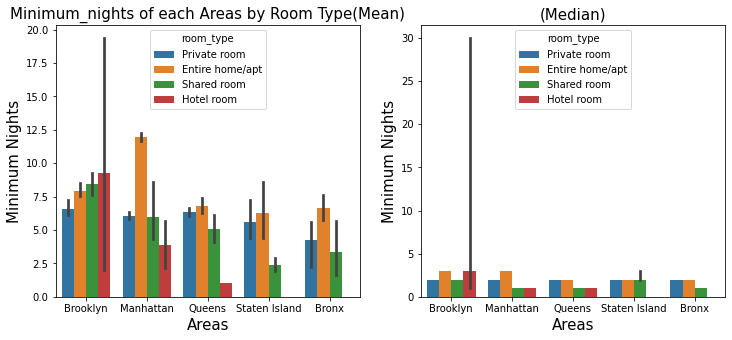

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df, x='neighbourhood_group', y='minimum_nights', hue='room_type', ax=ax[0])
ax[0].set_title("Minimum_nights of each Areas by Room Type(Mean)", size=15)
ax[0].set_xlabel("Areas", size=15)
ax[0].set_ylabel("Minimum Nights", size=15)

sns.barplot(data=df, x='neighbourhood_group', y='minimum_nights', hue='room_type', ax=ax[1], estimator=median)
ax[1].set_title("(Median)", size=15)
ax[1].set_xlabel("Areas", size=15)
ax[1].set_ylabel("Minimum Nights", size=15)

plt.show()

Since there is a huge errors by shared room and Staten Island, which is a very small data, i added a median value just to check them out.

The average of minimun nights by entire home/apartment is higher than other options.

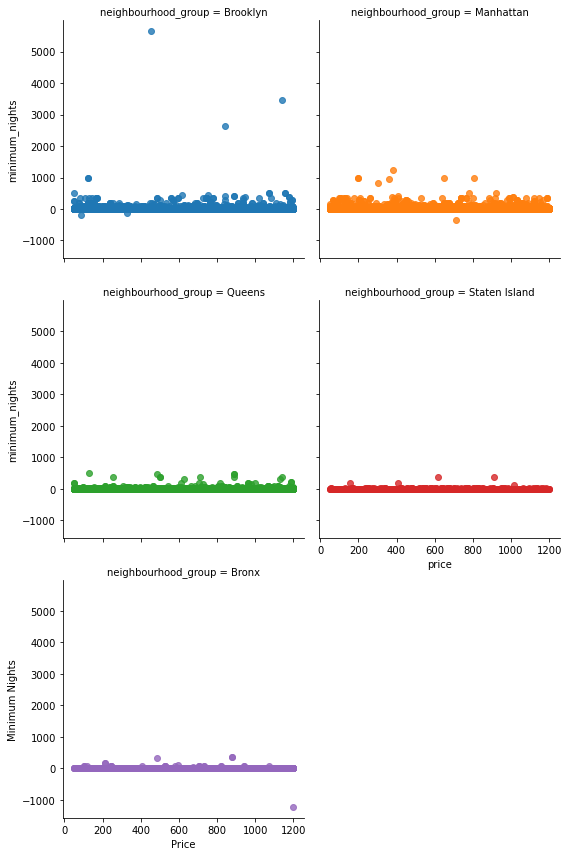

In [29]:
sns.lmplot(x="price", y="minimum_nights", col="neighbourhood_group", hue="neighbourhood_group", data=df, col_wrap=2, height=4)

plt.xlabel('Price', size=10)
plt.ylabel("Minimum Nights", size=10)

plt.show()

There is a barely relationship between price and minimum nights.

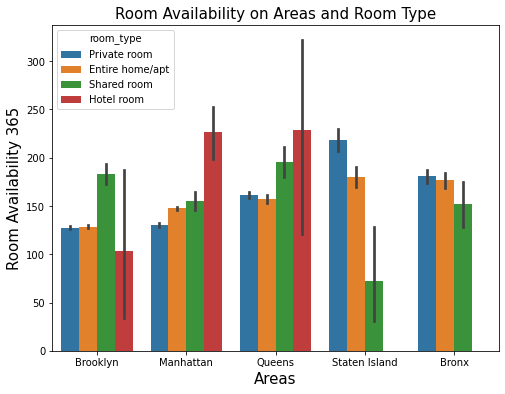

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type')

plt.title("Room Availability on Areas and Room Type", size=15)
plt.xlabel("Areas", size=15)
plt.ylabel("Room Availability 365", size=15)
           
plt.show()

In [31]:
top20_neighbourhood= df['neighbourhood'].value_counts().head(20)

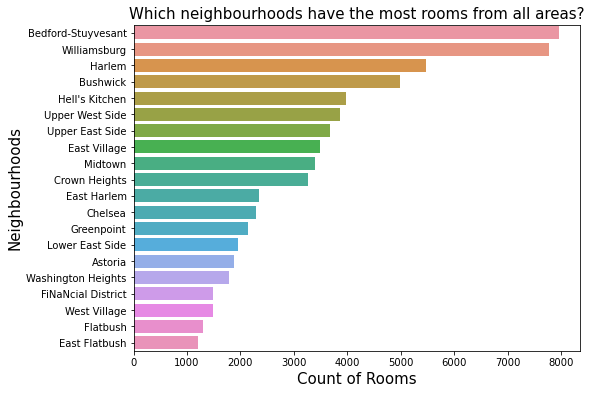

In [32]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df, x=top20_neighbourhood, y=top20_neighbourhood.index)

plt.title("Which neighbourhoods have the most rooms from all areas?", size=15)
plt.xlabel("Count of Rooms", size=15)
plt.ylabel("Neighbourhoods", size=15)

plt.show()

In [33]:
count_neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].nunique()
count_neighbourhood

neighbourhood_group
Bronx            48
Brooklyn         48
Manhattan        40
Queens           52
Staten Island    44
Name: neighbourhood, dtype: int64

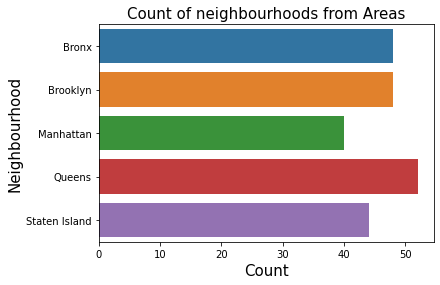

In [34]:
sns.barplot(data=df, x=count_neighbourhood, y=count_neighbourhood.index)

plt.title("Count of neighbourhoods from Areas", size=15)
plt.xlabel("Count", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

In [35]:
top_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)
top_price

neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                792.260870
Mill Basin                 775.142857
Riverdale                  768.736842
East Morrisania            764.666667
Morris Heights             742.891304
Pelham Bay                 740.045455
North Riverdale            736.250000
Graniteville               732.571429
Bath Beach                 725.270833
Columbia St                716.662921
Eltingville                712.000000
Woodrow                    709.333333
Todt Hill                  707.000000
Name: price, dtype: float64

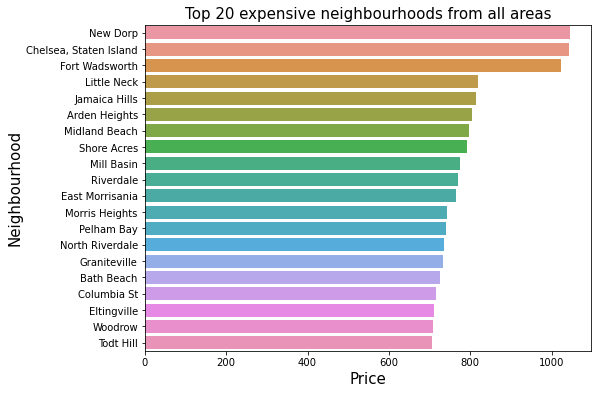

In [36]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df, x=top_price, y=top_price.index)

plt.title("Top 20 expensive neighbourhoods from all areas", size=15)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

In [37]:
manhattan = df[df['neighbourhood_group'] == "Manhattan"]
m_price = manhattan.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

In [38]:
brooklyn = df[df['neighbourhood_group'] == 'Brooklyn']
b_price = brooklyn.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

In [39]:
queens = df[df['neighbourhood_group'] == 'Queens']
q_price = queens.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

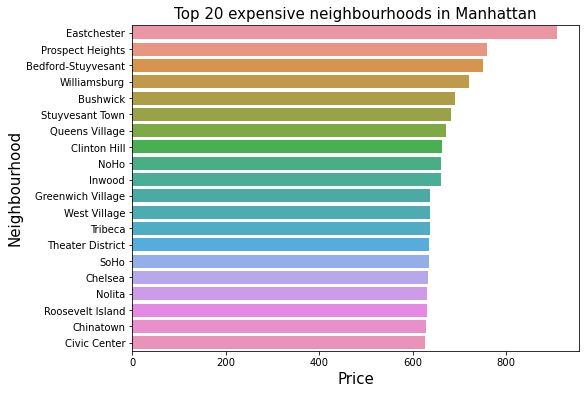

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=manhattan, x=m_price, y=m_price.index)

plt.title("Top 20 expensive neighbourhoods in Manhattan", size=15)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

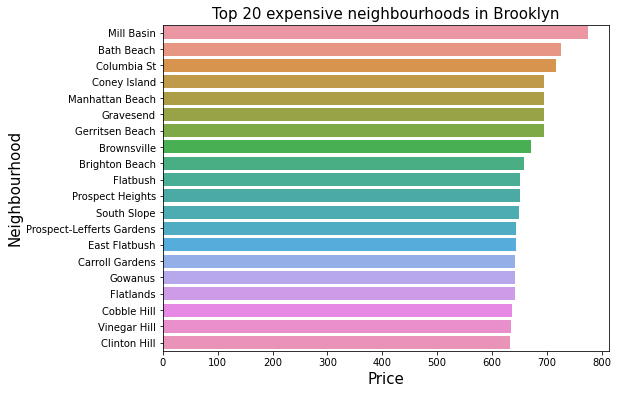

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=brooklyn, x=b_price, y=b_price.index)

plt.title("Top 20 expensive neighbourhoods in Brooklyn", size=15)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

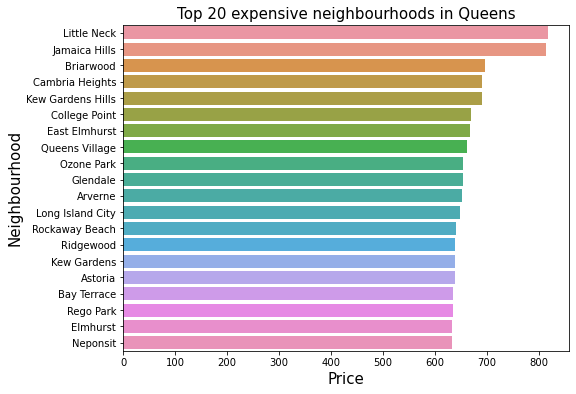

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=queens, x=q_price, y=q_price.index)

plt.title("Top 20 expensive neighbourhoods in Queens", size=15)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

Room vs Host vs Review (What kind of rooms, areas or hosts are popular than others? and why?)


In [43]:
neighbourhood_review = df.groupby(['neighbourhood'])[['number_of_reviews', 'reviews_per_months']].mean().sort_values(by='number_of_reviews',ascending=False).head(10)
neighbourhood_review

,number_of_reviews,reviews_per_months
neighbourhood,,
Huguenot,119.000000,3.674444
Silver Lake,99.000000,3.453333
Richmondtown,92.400000,2.002000
East Elmhurst,88.417695,4.065041
Eltingville,85.142857,2.070000
Springfield Gardens,75.370968,3.547137
Allerton,56.618557,1.943093
Manhattan Beach,55.818182,1.414545
Mount Eden,55.611111,1.565556


In [44]:
n_list = ["Silver Lake","East Elmhurst","Richmondtown","Eltingville","Mount Eden","Springfield Gardens","Huguenot","Manhattan Beach","DUMBO","Allerton"]
top10_n = df[df['neighbourhood'].isin(n_list)]

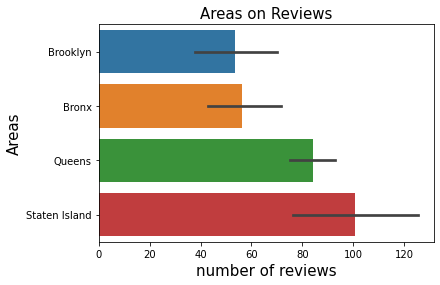

In [45]:
fig, ax = plt.subplots()
sns.barplot(data=top10_n, x='number_of_reviews', y='neighbourhood_group')

plt.title("Areas on Reviews", size=15)
plt.xlabel("number of reviews", size=15)
plt.ylabel("Areas", size=15)

plt.show()

In [46]:
top10_host_list = ["Dona", "Asa", "Dennis & Naoko", "Miss Dy", "Shunichi", "Gladys & Bob", "Sne", "Malini", "Amia", "J. E"]
top10_host = df[df['host_name'].isin(top10_host_list)]

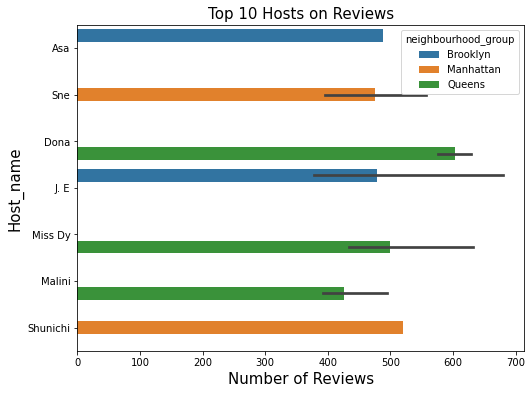

In [47]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=top10_host, x='number_of_reviews', y='host_name', hue='neighbourhood_group')

plt.title("Top 10 Hosts on Reviews", size=15)
plt.xlabel('Number of Reviews', size=15)
plt.ylabel("Host_name", size=15)

plt.show()

In [48]:
df.columns


Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'country', 'country_code', 'instant_bookable', 'cancellation_policy',
       'room_type', 'Construction_year', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_months', 'reviews_rate_number',
       'calculated_host_listings_per_count', 'availability_365', 'house_rules',
       'license'],
      dtype='object')

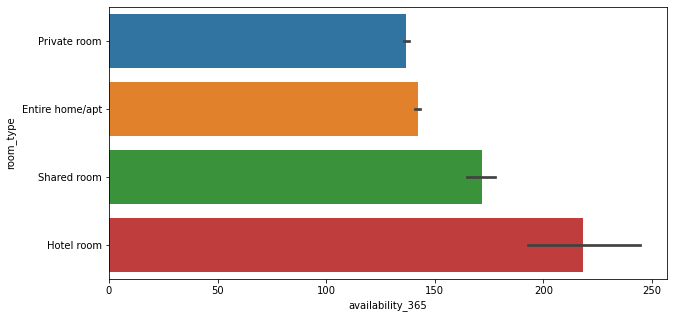

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['availability_365'],y=df['room_type'])
plt.show()

<AxesSubplot:>

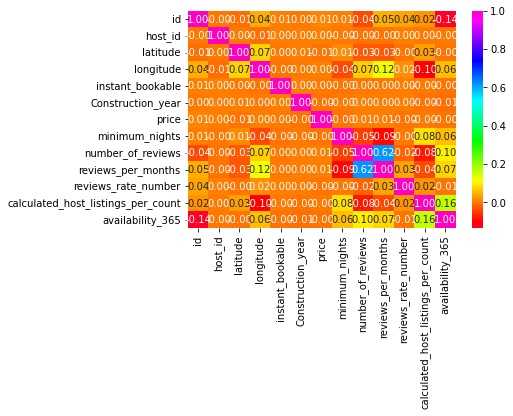

In [51]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = 'gist_rainbow')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  102599 non-null  int64  
 1   NAME                                102599 non-null  object 
 2   host_id                             102599 non-null  int64  
 3   host_identity_verified              102599 non-null  object 
 4   host_name                           102599 non-null  object 
 5   neighbourhood_group                 102599 non-null  object 
 6   neighbourhood                       102599 non-null  object 
 7   latitude                            102599 non-null  float64
 8   longitude                           102599 non-null  float64
 9   country                             102599 non-null  object 
 10  country_code                        102599 non-null  object 
 11  instant_bookable          

In [53]:
#dropping unnecessary columns
df = df.drop(['country_code','license','house_rules','Construction_year','cancellation_policy','country','latitude','longitude','host_identity_verified','id','NAME','host_id','host_name','latitude','longitude','last_review'],axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   neighbourhood_group                 102599 non-null  object 
 1   neighbourhood                       102599 non-null  object 
 2   instant_bookable                    102599 non-null  bool   
 3   room_type                           102599 non-null  object 
 4   price                               102599 non-null  float64
 5   service_fee                         102599 non-null  object 
 6   minimum_nights                      102599 non-null  float64
 7   number_of_reviews                   102599 non-null  float64
 8   reviews_per_months                  102599 non-null  float64
 9   reviews_rate_number                 102599 non-null  float64
 10  calculated_host_listings_per_count  102599 non-null  float64
 11  availability_365          

In [55]:
df.dtypes

neighbourhood_group                    object
neighbourhood                          object
instant_bookable                         bool
room_type                              object
price                                 float64
service_fee                            object
minimum_nights                        float64
number_of_reviews                     float64
reviews_per_months                    float64
reviews_rate_number                   float64
calculated_host_listings_per_count    float64
availability_365                      float64
dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [57]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace(0,'null')
neighbourhood_group = pd.DataFrame({'Neighbourhood_group':df['neighbourhood_group'].unique()})
labelled = le.fit_transform(neighbourhood_group['Neighbourhood_group'])
neighbourhood_group['labelled'] = labelled
neighbourhood_group

,Neighbourhood_group,labelled
0,Brooklyn,1
1,Manhattan,2
2,Queens,3
3,Staten Island,4
4,Bronx,0


In [58]:
df["neighbourhood_group"]=le.fit_transform(df["neighbourhood_group"])
df["neighbourhood"]=le.fit_transform(df["neighbourhood"])
df["room_type"]=le.fit_transform(df["room_type"])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   neighbourhood_group                 102599 non-null  int32  
 1   neighbourhood                       102599 non-null  int32  
 2   instant_bookable                    102599 non-null  bool   
 3   room_type                           102599 non-null  int32  
 4   price                               102599 non-null  float64
 5   service_fee                         102599 non-null  object 
 6   minimum_nights                      102599 non-null  float64
 7   number_of_reviews                   102599 non-null  float64
 8   reviews_per_months                  102599 non-null  float64
 9   reviews_rate_number                 102599 non-null  float64
 10  calculated_host_listings_per_count  102599 non-null  float64
 11  availability_365          

In [60]:
df['instant_bookable'] = df['instant_bookable'].astype(int)
df['price'] = df['price'].astype(int)
df['service_fee'] = df['service_fee'].astype(int)
df['minimum_nights'] = df['minimum_nights'].astype(int)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df['reviews_per_months'] = df['reviews_per_months'].astype(int)
df['reviews_rate_number'] = df['reviews_rate_number'].astype(int)
df['calculated_host_listings_per_count'] = df['calculated_host_listings_per_count'].astype(int)
df['availability_365'] = df['availability_365'].astype(int)


In [61]:
df.dtypes

neighbourhood_group                   int32
neighbourhood                         int32
instant_bookable                      int32
room_type                             int32
price                                 int32
service_fee                           int32
minimum_nights                        int32
number_of_reviews                     int32
reviews_per_months                    int32
reviews_rate_number                   int32
calculated_host_listings_per_count    int32
availability_365                      int32
dtype: object

In [62]:
#normalizing datase
def normalise(feature):
    nmx = 100
    nmn = 0
    
    mx = feature.max()
    mn = feature.min()
    
    return ((nmx-nmn) / (mx-mn) * (feature-mx) + nmx)

df = normalise(df)

In [63]:
#training, testing
x=df.drop(columns="price",axis=1)
y=df["price"]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [65]:
#linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([99.30096016, 91.13644055, 18.42738131, ..., 79.42746889,
       56.09320589, 92.36017529])

In [66]:
predictions = pd.DataFrame({"original_Price": y_test.values, "predicted_Price": y_pred})
predictions.head(10)

,original_Price,predicted_Price
0,99.739130,99.300960
1,91.304348,91.136441
2,18.260870,18.427381
3,78.782609,78.498116
4,95.130435,94.951965
5,83.478261,83.360968
6,25.739130,25.775628
7,3.739130,4.148978
8,46.608696,46.529242
9,7.826087,8.103231


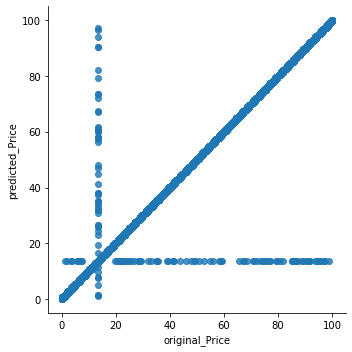

In [67]:
sns.lmplot(x="original_Price",y="predicted_Price",data=predictions)

In [68]:
model.score(x_test,y_test)

0.9877314910043326

In [69]:
error=y_pred-y_test
error

98862   -0.438170
72510   -0.167907
71729    0.166512
65918   -0.284493
2060    -0.178470
           ...   
39387    0.139609
67578    0.060227
35469   -0.224705
9667     0.180162
51934   -0.335477
Name: price, Length: 30780, dtype: float64

In [70]:
from sklearn import metrics
model.intercept_

0.1936266998206122

In [73]:
from sklearn.ensemble import RandomForestRegressor
Model=RandomForestRegressor(n_estimators=200)
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
y_pred

In [75]:
predictions = pd.DataFrame({"original_Price": y_test.values, "predicted_Price": y_pred})
predictions.head(10)

,original_Price,predicted_Price
0,99.739130,99.546957
1,91.304348,91.370435
2,18.260870,18.236087
3,78.782609,78.721739
4,95.130435,95.195217
5,83.478261,83.106522
6,25.739130,25.717391
7,3.739130,3.883478
8,46.608696,46.553478
9,7.826087,7.788696


<AxesSubplot:xlabel='original_Price', ylabel='predicted_Price'>

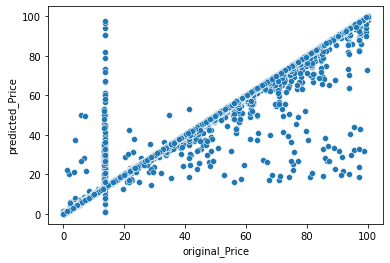

In [76]:
sns.scatterplot(x="original_Price",y="predicted_Price",data=predictions)